In [1]:
import DMN3 as DMN
from matplotlib import pyplot as plt
import numpy as np
from helperfuncs import *
import pandas as pd


In [2]:

def elasticity_matrix(E, nu):
    # plane strain elasticity matrix
    Ce = np.array([[1 - nu, nu, 0], [nu, 1 - nu, 0], [0, 0, (1 - 2 * nu)/2 ]])
    Ce *= E / ((1 - 2 * nu) * (1 + nu))

    return Ce

In [ ]:
# node = DMN.Node(np.ones(6)*2)
# node.compliance
# node.rotated_compliance = node.compliance
# p1 = np.array([0.7243458035427647,-0.6624489424587073,0.0,0.7243458035427647,0.0,2.7735894920029462])
# p2 = np.array([0.36757546481294456,-0.16233746963686535,0.0,0.3675754648129446,0.0,1.05982586889962])

data = pd.read_csv("data/building_block_data.csv",header=None)
data = data.to_numpy()
# data[0]

which = 52
# p1 = data[which][0:6]
# p2 = data[which][6:12]
# p3 = data[which][12:18]

p2 = convert_matrix(np.linalg.inv(elasticity_matrix(100*10**9,0.3)))*(10**9)
p1 = convert_matrix(np.linalg.inv(elasticity_matrix(300*10**9,0.3)))*(10**9)
# print(p1, p2)
# node.left = DMN.Node(p1)
# node.right = DMN.Node(p2)

# node.right.rotated_compliance = node.right.compliance
# node.left.rotated_compliance = node.left.compliance

# node.rotated_compliance = homogenise(node.left.rotated_compliance, node.right.rotated_compliance,0.2,0.8)

In [4]:
loading_path = np.linspace(0,0.05,150)
Model = DMN.Tree(5)

metadata,training_error,validation_error,root = load_model('models/model_N=5.pkl')

# root = Model.initialise(num_loading_steps=len(loading_path))

Model.propagate_weights(root)
Model.initialise_bottom_layer(root,p1,p2)
# print(loading_path)
Model.FeedForward(root,p1,p2)
Model.plasticity_loader(root,loading_path)



In [5]:
# Model.FeedForward(root,p1,p2)
print((convert_vectorised(root.rotated_compliance)))
print('original',convert_vectorised(p1))
final_stress= np.linalg.inv(convert_vectorised(root.rotated_compliance)) @ root.epss[-1]

print("Final stress:",final_stress)



[[ 0.14843824  0.04047045 -0.02672185]
 [ 0.04047045  0.14086004 -0.00104476]
 [-0.02672185 -0.00104476  0.13979135]]
original [[ 0.00151667 -0.00065     0.        ]
 [-0.00065     0.00151667  0.        ]
 [ 0.          0.          0.00433333]]
Final stress: [ 0.37931518 -0.10844913  0.07169758]


Text(0, 0.5, '$\\sigma_1$ (GPa)')

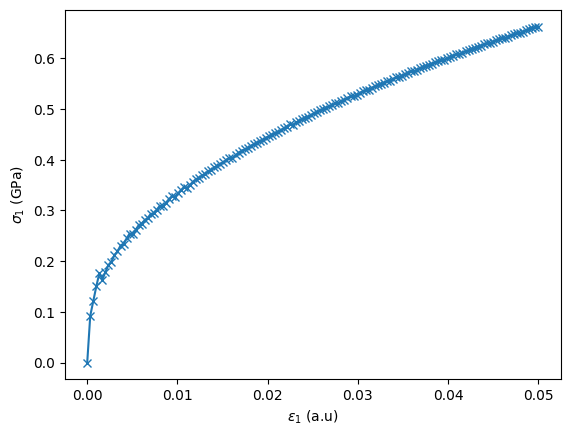

In [6]:
bottom_node = Model.fetch_node(root,3,31)

R = 150
L = 0
plt.plot(root.epss[L:R,0],root.sigmas[L:R,0],label='sigma_1',marker = 'x')
plt.xlabel(r'$\epsilon_1$ (a.u)')
plt.ylabel(r'$\sigma_1$ (GPa)')


In [7]:
bottom_node = Model.fetch_node(root,3,6)

root.delta_sigma,root.res_strain


(array([ 0.0015403 , -0.00028763, -0.00030462]),
 array([ 1.10431469e-04, -2.21398920e-05,  8.34428832e-05]))

In [8]:
for i in range(1,9):
    bottom_node = Model.fetch_node(root,5,i)
    print(bottom_node.eff_plas_strain)
   

0.000937570659369487
0.0006744050399857021
0.0007492795121124534
0.0008381373886442726
0.0011147353432435822
0.0004897800697612197
0.01150980210768355
0.01316710439743771
